In [408]:
# remember mean squared error
# compare RMSE and mean absolute error  if they are very different, that means something is wrong

# start with looking for outliers and # of std away from mean

In [409]:
"""For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

anything above 5 is strong multicollinearity

remove some features and check out vif again. it will be different
"""

'For each X, calculate VIF and save in dataframe\nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["features"] = X.columns\n\nanything above 5 is strong multicollinearity\n\nremove some features and check out vif again. it will be different\n'

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [410]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [411]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [412]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [413]:
data['waterfront'].fillna(0, inplace=True)
data['view'].fillna(0, inplace=True)

In [414]:
data.dropna(inplace=True)

In [415]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].apply(lambda date: date.year)

In [416]:
data['age'] = np.where(data['yr_renovated']>0, data['year'] - data['yr_renovated'], data['year']-data['yr_built'])

In [417]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,23.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28.0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13.0


In [418]:
data.loc[data['grade'] == 1, 'grade'] = 1
data.loc[data['grade'] == 2, 'grade'] = 1
data.loc[data['grade'] == 3, 'grade'] = 1
data.loc[data['grade'] == 4, 'grade'] = 2
data.loc[data['grade'] == 5, 'grade'] = 2
data.loc[data['grade'] == 6, 'grade'] = 2
data.loc[data['grade'] == 7, 'grade'] = 3
data.loc[data['grade'] == 8, 'grade'] = 3
data.loc[data['grade'] == 9, 'grade'] = 4
data.loc[data['grade'] == 10, 'grade'] = 4
data.loc[data['grade'] == 11, 'grade'] = 5
data.loc[data['grade'] == 12, 'grade'] = 5
data.loc[data['grade'] == 13, 'grade'] = 5

In [419]:


# if data['grade'].isin([1,2,3]):
#     data['grade'] = 1
# elif data['grade'].isin([4,5,6]):
#     data['grade'] = 2
# elif data['grade'].isin([7,8]):
#     data['grade'] = 3
# elif data['grade'].isin([9,10]):
#     data['grade'] = 4
# else:
#     data['grade'] = 5

In [420]:
data['grade'].value_counts()

3    12347
4     3109
2     1889
5      409
1        1
Name: grade, dtype: int64

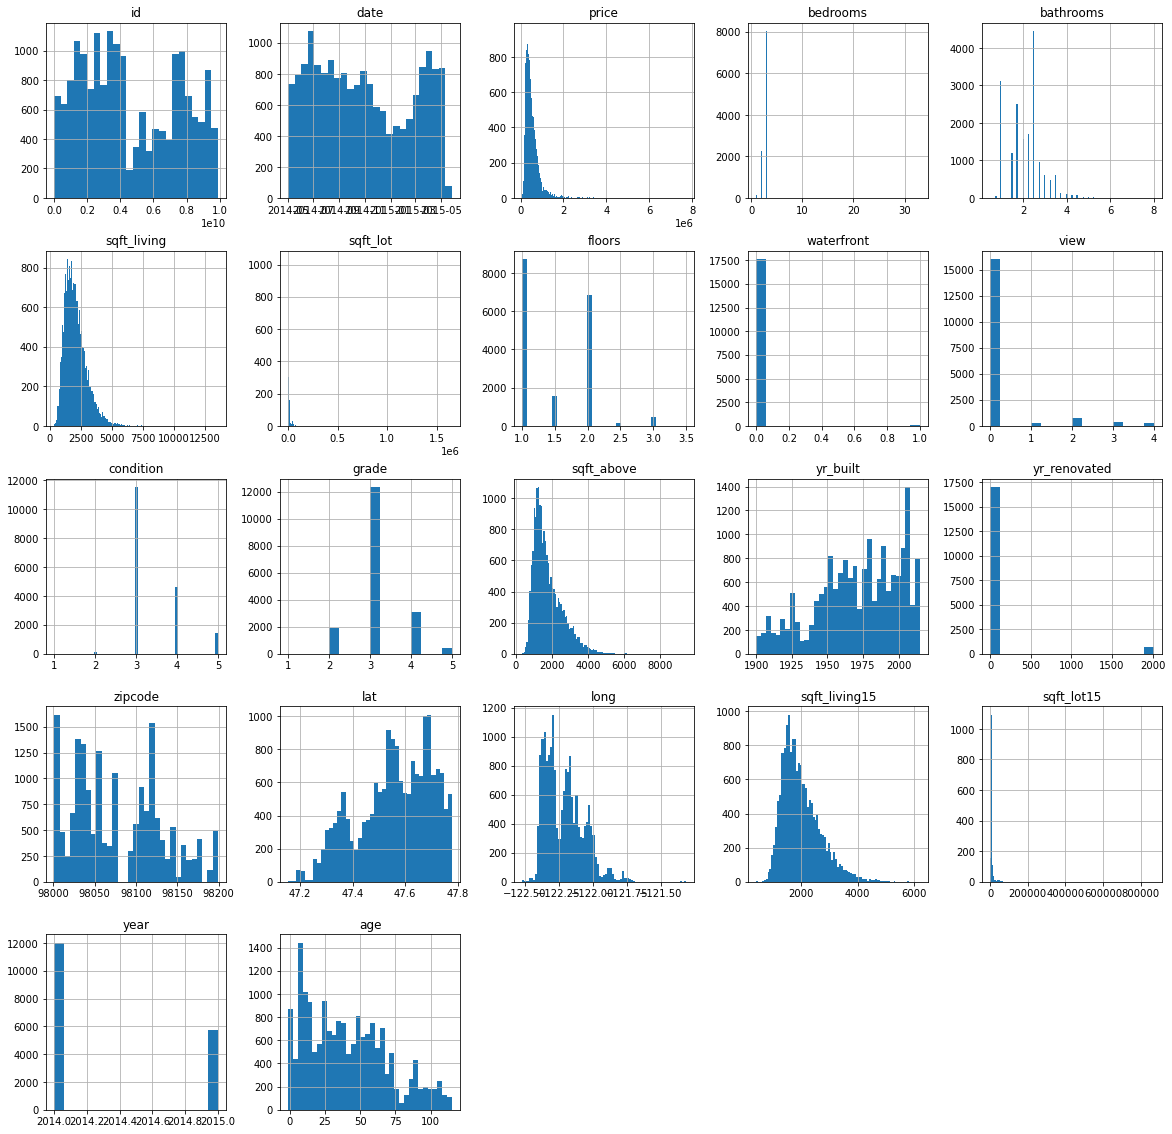

In [421]:
data.hist(figsize=(20,20), bins='auto');

In [422]:
# Drop features that our stakeholders aren't interested in. (ex: they wouldn't want to renovate 
# their whole house to make their grade of their house go up or down just to sell their house)

#data.drop(['id','date','year','yr_renovated'], axis=1, inplace=True)
data.drop(['id','date','year','yr_renovated', 'grade', 'view', 'zipcode', 'waterfront', 'lat', 'long'], axis=1, inplace=True)

In [423]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
age              0
dtype: int64

In [424]:
data['sqft_basement'].value_counts()

0.0       10546
?           366
600.0       176
500.0       170
700.0       164
          ...  
1245.0        1
1284.0        1
768.0         1
1960.0        1
475.0         1
Name: sqft_basement, Length: 287, dtype: int64

In [425]:
data = data[(data != '?').all(axis=1)]

In [426]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [427]:
data['bedrooms'].describe()

count    17389.000000
mean         3.377998
std          0.931716
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [428]:
# Remove outlier
data = data[data['bedrooms'] < 15]

## log the price to normalize the data

In [429]:
import numpy as np

data['price'] = np.log(data['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

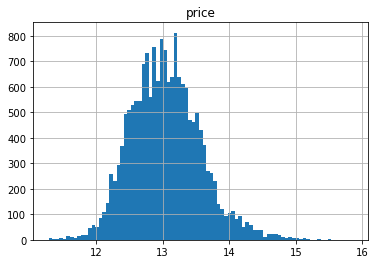

In [430]:
data.hist('price', bins='auto')

Take only data set that is 3 STD away from the mean of the price

In [431]:
data = data[(data['price'] < (data['price'].mean() + data['price'].std()*3)) & (data['price'] > (data['price'].mean() - data['price'].std()*3))]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

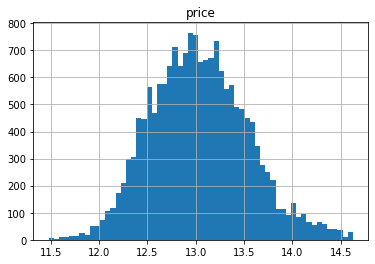

In [432]:
data.hist('price', bins='auto')

## Train_Test_Split

In [433]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [434]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12939 4313 12939 4313


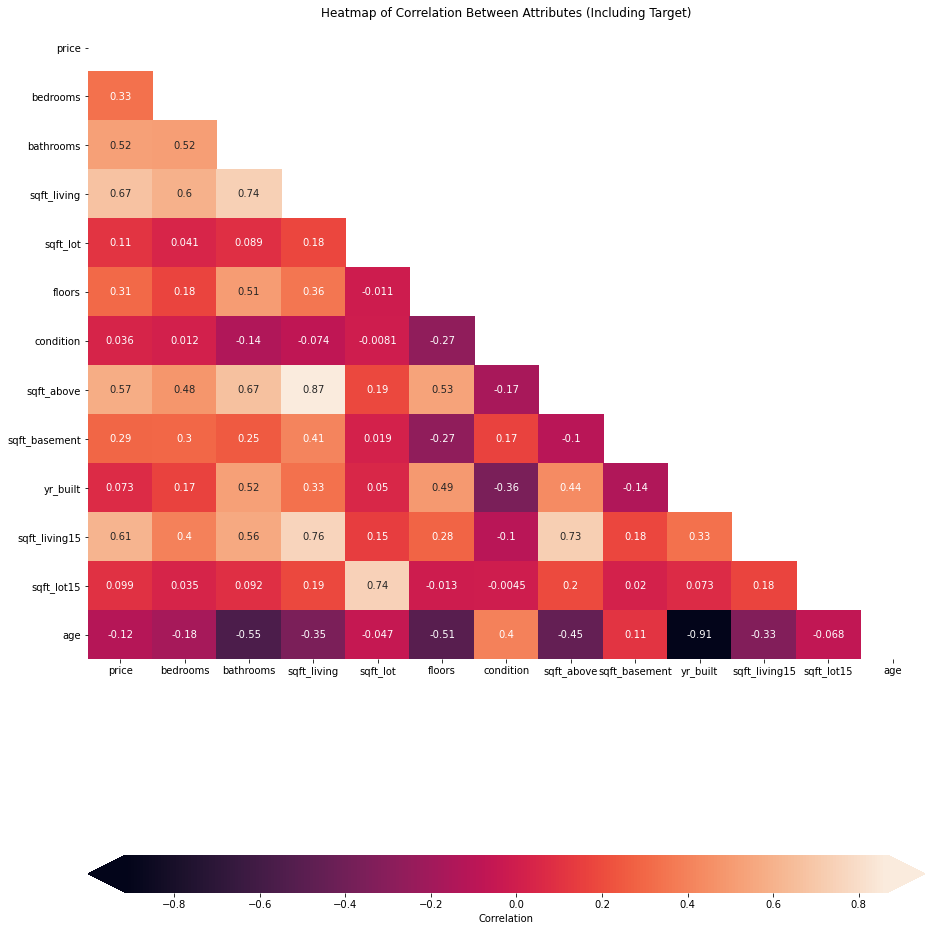

In [435]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 18))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

# Baseline Model

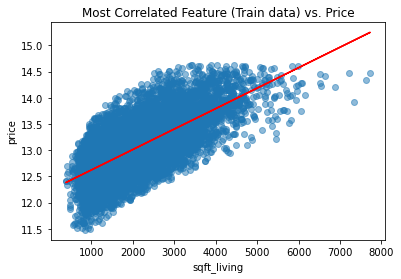

In [436]:
most_correlated_feature = 'sqft_living'

from sklearn.linear_model import LinearRegression

lg = LinearRegression()

lg.fit(X_train[[most_correlated_feature]], y_train)
y_train_hat = lg.predict(X_train[[most_correlated_feature]])
y_test_hat = lg.predict(X_test[[most_correlated_feature]])

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.plot(X_train[most_correlated_feature], y_train_hat, c='red')
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature (Train data) vs. Price");

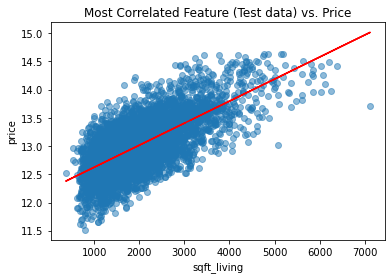

In [437]:
fig, ax = plt.subplots()

ax.scatter(X_test[most_correlated_feature], y_test, alpha=0.5)
ax.plot(X_test[most_correlated_feature], y_test_hat, c='red')
ax.set_xlabel('sqft_living')
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature (Test data) vs. Price");

In [438]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()



splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.45471568014346625
Validation score: 0.4516939315525678


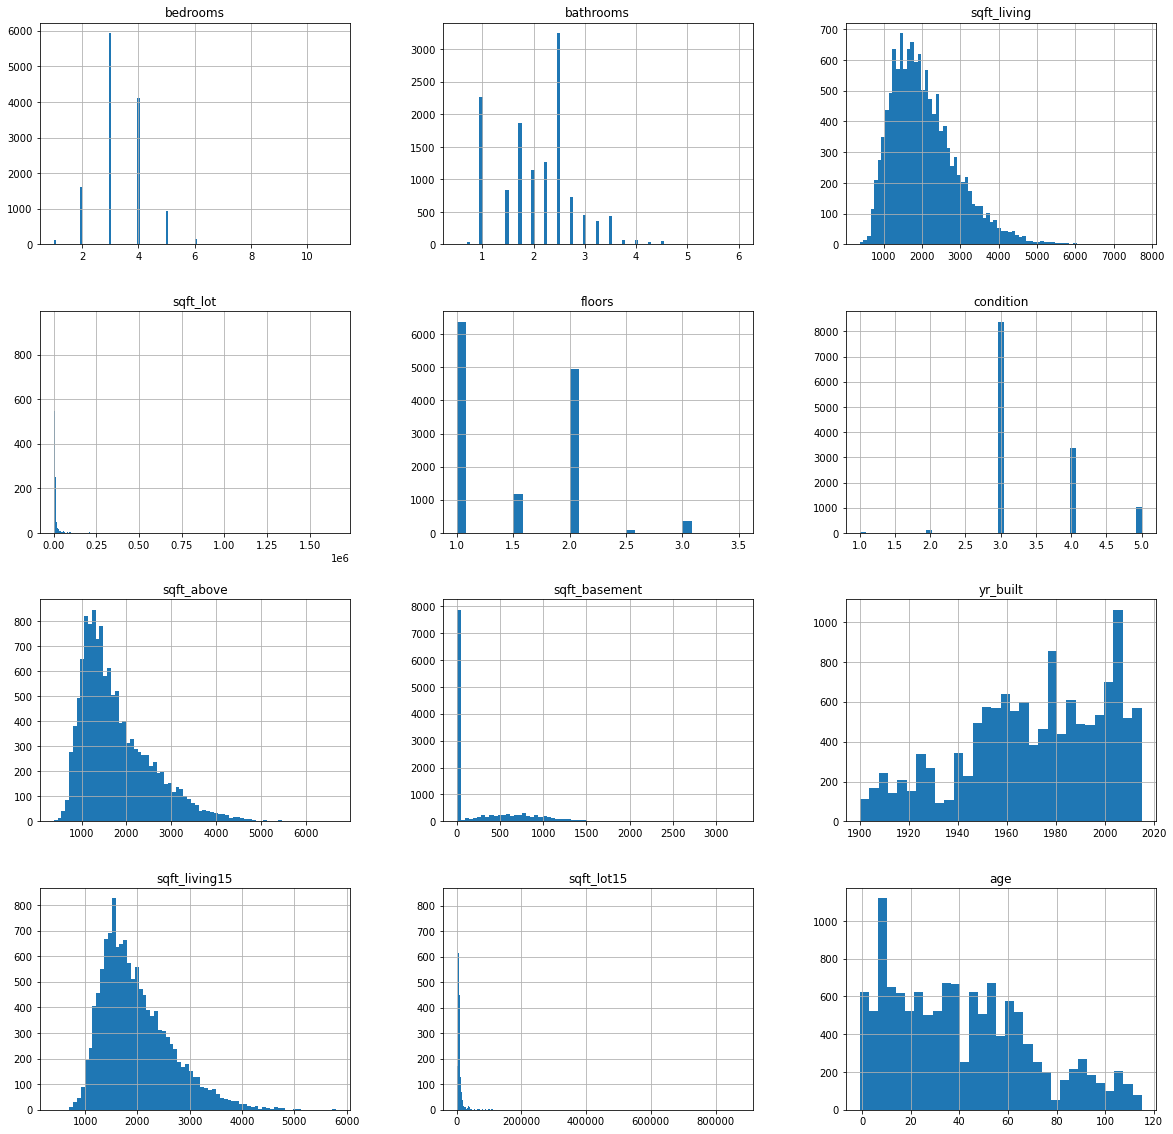

In [439]:
X_train.hist(figsize=(20,20), bins='auto');

## Check correlations between each features and remove

In [440]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_0', 'level_1'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [441]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(age, yr_built)",0.912175
"(sqft_living, sqft_above)",0.865590
"(sqft_living15, sqft_living)",0.758544


Since three different pairs of variables are highly correlated, the correct approach would be to one variable from the pairs.

We can remove yr_built since age comes from using yr_built.

We can remove sqft_above since sqft_above is square footage of house apart from basement which is similar to sqft_living.

We can remove sqft_living15 since the square footage of interior housing living space for the nearest 15 neighbors is more import than sqft_living.

In [442]:
X_train.drop(['yr_built', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
X_test.drop(['yr_built', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [443]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,sqft_lot15,age
10233,3,1.50,2680,4775,2.0,5,800.0,5947,101.0
6961,4,2.50,2010,7226,2.0,3,0.0,7696,19.0
6823,4,2.50,2220,4720,2.0,3,0.0,4717,17.0
10633,3,2.25,1800,7371,1.0,3,520.0,7675,35.0
2379,3,2.25,1552,3600,2.0,3,0.0,3600,3.0


## Look at model

In [444]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1499.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:13:19   Log-Likelihood:                -4805.8
No. Observations:               12939   AIC:                             9632.
Df Residuals:                   12929   BIC:                             9706.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7620      0.024    487.128      0.000      11.715      11.809
bedrooms         -0.0766      0.004    -17.405      0.000      -0.085      -0.068
bathrooms         0.0998      0.007     13.415      0.000       0.085       0.114
sqft_living       0.0004   6.22e-06     61.792      0.000       0.000       0.000
sqft_lot       2.007e-07   1.13e-07      1.779      0.075   -2.05e-08    4.22e-07
floors            0.1476      0.008     18.563      0.000       0.132       0.163
condition         0.0418      0.005      7.976      0.000       0.031       0.052
sqft_basement  3.704e-05   9.16e-06      4.044      0.000    1.91e-05     5.5e-05
sqft_lot15    -5.565e-07   1.66e-07     -3.349      0.001   -8.82e-07   -2.31e-07
age               0.0040      0.000     26.969      0.000       0.004       0.004
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.217
Skew:                          -0.002   Prob(JB):                        0.897
Kurtosis:                       2.980   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove insignificant features

We are going to remove sqft_lot

In [445]:
X_train.drop(['sqft_lot'], axis=1, inplace=True)
X_test.drop(['sqft_lot'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [446]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1686.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:13:37   Log-Likelihood:                -4807.4
No. Observations:               12939   AIC:                             9633.
Df Residuals:                   12930   BIC:                             9700.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7621      0.024    487.090      0.000      11.715      11.809
bedrooms         -0.0768      0.004    -17.439      0.000      -0.085      -0.068
bathrooms         0.0999      0.007     13.427      0.000       0.085       0.114
sqft_living       0.0004   6.21e-06     62.056      0.000       0.000       0.000
floors            0.1471      0.008     18.511      0.000       0.132       0.163
condition         0.0416      0.005      7.952      0.000       0.031       0.052
sqft_basement  3.637e-05   9.15e-06      3.973      0.000    1.84e-05    5.43e-05
sqft_lot15     -3.42e-07   1.14e-07     -2.992      0.003   -5.66e-07   -1.18e-07
age               0.0040      0.000     27.024      0.000       0.004       0.004
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.202
Skew:                          -0.001   Prob(JB):                        0.904
Kurtosis:                       2.981   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Make dummy variables

In [447]:
#categoricals = ['view', 'condition', 'grade']
categoricals = ['condition']

X_train_categoricals = X_train.loc[:,categoricals]
X_test_categoricals = X_test.loc[:,categoricals]

In [448]:
from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop='first')
ohe = OneHotEncoder(handle_unknown='ignore')
enc = ohe.fit(X_train_categoricals)

X_train_trans_categ = enc.transform(X_train_categoricals)
X_test_trans_categ = enc.transform(X_test_categoricals)

X_train_trans_categ_df = pd.DataFrame(X_train_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_test_trans_categ_df = pd.DataFrame(X_test_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_train_trans_categ_df

,condition_1,condition_2,condition_3,condition_4,condition_5
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
12934,0.0,0.0,0.0,1.0,0.0
12935,0.0,0.0,1.0,0.0,0.0
12936,0.0,0.0,1.0,0.0,0.0
12937,0.0,0.0,1.0,0.0,0.0


Now we are going to drop categorical features in the original X_train data and add the dummy variables to it

In [449]:
X_train.drop(categoricals, axis=1, inplace=True)
X_test.drop(categoricals, axis=1, inplace=True)

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [450]:
X_train.reset_index(drop=True, inplace=True)
X_train_trans_categ_df.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
X_test_trans_categ_df.reset_index(drop=True, inplace=True)

X_train_with_dummy = pd.concat([X_train, X_train_trans_categ_df], axis=1)
X_test_with_dummy = pd.concat([X_test, X_test_trans_categ_df], axis=1)
X_train_with_dummy

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_lot15,age,condition_1,condition_2,condition_3,condition_4,condition_5
0,3,1.50,2680,2.0,800.0,5947,101.0,0.0,0.0,0.0,0.0,1.0
1,4,2.50,2010,2.0,0.0,7696,19.0,0.0,0.0,1.0,0.0,0.0
2,4,2.50,2220,2.0,0.0,4717,17.0,0.0,0.0,1.0,0.0,0.0
3,3,2.25,1800,1.0,520.0,7675,35.0,0.0,0.0,1.0,0.0,0.0
4,3,2.25,1552,2.0,0.0,3600,3.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12934,4,1.00,980,1.5,0.0,3000,101.0,0.0,0.0,0.0,1.0,0.0
12935,4,2.50,1960,2.0,0.0,5250,17.0,0.0,0.0,1.0,0.0,0.0
12936,3,2.50,1610,3.0,0.0,2187,12.0,0.0,0.0,1.0,0.0,0.0
12937,3,1.75,1930,1.0,700.0,6000,78.0,0.0,0.0,1.0,0.0,0.0


## Standard Scaler for continuous features

In [451]:
continuous = ['age', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement','sqft_lot15']
#continuous = list(X_train_with_dummy.columns)

X_train_continuous = X_train_with_dummy.loc[:,continuous]
X_test_continuous = X_test_with_dummy.loc[:,continuous]

In [452]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_cont_fit = ss.fit(X_train_continuous)

X_train_cont_scaled = X_train_cont_fit.transform(X_train_continuous)
X_test_cont_scaled = X_train_cont_fit.transform(X_test_continuous)

X_train_cont_scaled_df = pd.DataFrame(X_train_cont_scaled, columns=continuous)
X_test_cont_scaled_df = pd.DataFrame(X_test_cont_scaled, columns=continuous)

In [453]:
X_train_with_dummy.drop(continuous, axis=1, inplace=True)
X_test_with_dummy.drop(continuous, axis=1, inplace=True)

In [454]:
X_train_with_dummy.reset_index(drop=True, inplace=True)
X_train_cont_scaled_df.reset_index(drop=True, inplace=True)

X_test_with_dummy.reset_index(drop=True, inplace=True)
X_test_cont_scaled_df.reset_index(drop=True, inplace=True)

X_train_with_dummy_scaled = pd.concat([X_train_cont_scaled_df, X_train_with_dummy], axis=1)
X_test_with_dummy_scaled = pd.concat([X_test_cont_scaled_df, X_test_with_dummy], axis=1)
X_train_with_dummy_scaled

,age,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5
0,2.088763,-0.411243,-0.820574,0.709604,0.943989,1.171174,-0.243671,0.0,0.0,0.0,0.0,1.0
1,-0.760422,0.704755,0.524849,-0.064330,0.943989,-0.664382,-0.181117,0.0,0.0,1.0,0.0,0.0
2,-0.829915,0.704755,0.524849,0.178246,0.943989,-0.664382,-0.287663,0.0,0.0,1.0,0.0,0.0
3,-0.204484,-0.411243,0.188493,-0.306907,-0.918227,0.528729,-0.181869,0.0,0.0,1.0,0.0,0.0
4,-1.316361,-0.411243,0.188493,-0.593378,0.943989,-0.664382,-0.327613,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12934,2.088763,0.704755,-1.493286,-1.254109,0.012881,-0.664382,-0.349072,0.0,0.0,0.0,1.0,0.0
12935,-0.829915,0.704755,0.524849,-0.122086,0.943989,-0.664382,-0.268600,0.0,0.0,1.0,0.0,0.0
12936,-1.003645,-0.411243,0.524849,-0.526380,2.806205,-0.664382,-0.378149,0.0,0.0,1.0,0.0,0.0
12937,1.289601,-0.411243,-0.484218,-0.156740,-0.918227,0.941729,-0.241776,0.0,0.0,1.0,0.0,0.0


## Try Linear Regression with X_train_with_dummy Using Sklearn

In [455]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_with_dummy_scaled, y_train)
#linreg.fit(X_train_cont_scaled_df, y_train)

LinearRegression()

In [487]:
y_hat_train = linreg.predict(X_train_with_dummy_scaled)

y_hat_test = linreg.predict(X_test_with_dummy_scaled)

In [490]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'Train R-Squared: {r2_score(y_train, y_hat_train)}')
print(f'Test R-Squared: {r2_score(y_test, y_hat_test)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, y_hat_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_hat_test)}\n')

print(f'Train MSE: {mean_squared_error(y_train, y_hat_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_hat_test)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, y_hat_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_hat_test, squared=False)}')

Train R-Squared: 0.5128060155748848
Test R-Squared: 0.49899542040615674

Train MAE: 0.28213967729806394
Test MAE: 0.28925052067760537

Train MSE: 0.12253322548544146
Test MSE: 0.12763728461929252

Train RMSE: 0.3500474617611753
Test RMSE: 0.3572636066258254


In [491]:
linreg.intercept_

12.95678087622873

In [492]:
# coef = linreg.coef_
# coef

In [493]:
# exp_coef = np.exp(coef)
# exp_coef

In [498]:
coef = dict(zip(X_train_with_dummy_scaled.columns, linreg.coef_))
coef

{'age': 0.11800974317665744,
 'bedrooms': -0.06874383369592577,
 'bathrooms': 0.07385621644607905,
 'sqft_living': 0.3331079856174082,
 'floors': 0.07699960262081018,
 'sqft_basement': 0.01576236741206593,
 'sqft_lot15': -0.00832405550753418,
 'condition_1': -0.09476002283805078,
 'condition_2': -0.22458574656511376,
 'condition_3': 0.07509957612836154,
 'condition_4': 0.09379559912383913,
 'condition_5': 0.15045059415096404}

In [495]:
sorted(coef.items(), key=lambda x:x[1], reverse=True)

[('sqft_living', 0.3331079856174082),
 ('condition_5', 0.15045059415096404),
 ('age', 0.11800974317665744),
 ('condition_4', 0.09379559912383913),
 ('floors', 0.07699960262081018),
 ('condition_3', 0.07509957612836154),
 ('bathrooms', 0.07385621644607905),
 ('sqft_basement', 0.01576236741206593),
 ('sqft_lot15', -0.00832405550753418),
 ('bedrooms', -0.06874383369592577),
 ('condition_1', -0.09476002283805078),
 ('condition_2', -0.22458574656511376)]

In [501]:
pecent = (np.exp(linreg.coef_) - 1) * 100
pecent

array([ 12.52550749,  -6.64342025,   7.66519895,  39.52979624,
         8.00416472,   1.58872488,  -0.82895065,  -9.04088106,
       -20.11529246,   7.79914878,   9.83352223,  16.23578764])

In [504]:
percent_dict = dict(zip(X_train_with_dummy_scaled.columns, pecent))
percent_dict

{'age': 12.525507487291176,
 'bedrooms': -6.64342024500566,
 'bathrooms': 7.665198951710184,
 'sqft_living': 39.52979624468291,
 'floors': 8.004164720644024,
 'sqft_basement': 1.5887248804645981,
 'sqft_lot15': -0.8289506486604203,
 'condition_1': -9.040881060875039,
 'condition_2': -20.115292462967716,
 'condition_3': 7.799148775920539,
 'condition_4': 9.833522228978797,
 'condition_5': 16.235787640672285}

In [505]:
sorted(percent_dict.items(), key=lambda x:x[1], reverse=True)

[('sqft_living', 39.52979624468291),
 ('condition_5', 16.235787640672285),
 ('age', 12.525507487291176),
 ('condition_4', 9.833522228978797),
 ('floors', 8.004164720644024),
 ('condition_3', 7.799148775920539),
 ('bathrooms', 7.665198951710184),
 ('sqft_basement', 1.5887248804645981),
 ('sqft_lot15', -0.8289506486604203),
 ('bedrooms', -6.64342024500566),
 ('condition_1', -9.040881060875039),
 ('condition_2', -20.115292462967716)]

## Build and Evaluate a Final Predictive Model

In [465]:
best_features = ['bathrooms', 'sqft_living']

In [466]:
X_train_final = X_train_with_dummy_scaled[best_features]
X_test_final = X_test_with_dummy_scaled[best_features]

In [467]:
final_model = LinearRegression()


final_model.fit(X_train_final, y_train)


final_model.score(X_test_final, y_test)

0.45829901944250506

In [480]:
mean_squared_error(np.exp(y_test), np.exp(final_model.predict(X_test_final)), squared=False)

222376.1469662508

In [481]:
mean_absolute_error(np.exp(y_test), np.exp(final_model.predict(X_test_final)))

154987.837716175

In [482]:
print(pd.Series(np.exp(final_model.coef_), index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", np.exp(final_model.intercept_))

bathrooms      1.027307
sqft_living    1.374390
Name: Coefficients, dtype: float64

Intercept: 460591.58142418717


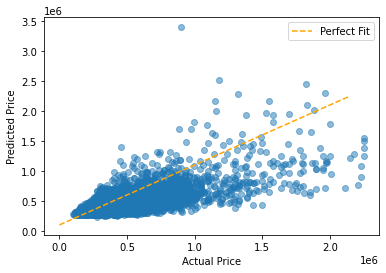

In [472]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(np.exp(y_test).min(), np.exp(y_test).max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(np.exp(y_test), np.exp(preds), alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

## Investigating Normality

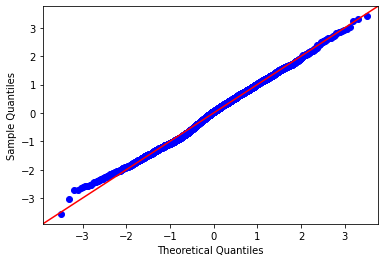

In [479]:
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

## Investigating Multicollinearity

In [475]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bathrooms      2.201273
sqft_living    2.201273
Name: Variance Inflation Factor, dtype: float64

## Investigating Homoscedasticity

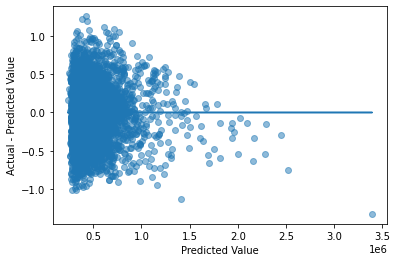

In [477]:
fig, ax = plt.subplots()

ax.scatter(np.exp(preds), residuals, alpha=0.5)
ax.plot(np.exp(preds), [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Linear Regression Assumptions Conclusion

In [ ]:
from  itertools import combinations

combination = list(combinations(X_train_with_dummy_scaled, 2))

r_squared = dict()
mae = dict()
mse = dict()
rmse = dict()

for comb in combination:
    r_squared[comb] = 0
    mae[comb] = 0
    mse[comb] = 0
    rmse[comb] = 0
    
    X_train_final2 = X_train_with_dummy_scaled[list(comb)]
    X_test_final2 = X_test_with_dummy_scaled[list(comb)]
    final_model = LinearRegression()
    final_model.fit(X_train_final2, y_train)   
    
    y_hat_train2 = final_model.predict(X_train_final2)
    y_hat_test2 = final_model.predict(X_test_final2)
    
    r_squared[comb] = final_model.score(X_test_final2, y_test)
    
    mae[comb]= (mean_absolute_error(y_train, y_hat_train2), mean_absolute_error(y_test, y_hat_test2))
    
    mse[comb] = (mean_squared_error(y_train, y_hat_train2), mean_squared_error(y_test, y_hat_test2))
    
    rmse[comb] = (mean_squared_error(y_train, y_hat_train2, squared=False), mean_squared_error(y_test, y_hat_test2, squared=False))

In [ ]:
sorted(r_squared.items(), key=lambda item: item[1], reverse=True)[:3]

In [ ]:
top_3_r_squared = dict(sorted(r_squared.items(), key=lambda item: item[1], reverse=True)[:3])

print('R-Squared')
for comb in top_3_r_squared.keys():
    print(f'{comb} {top_3_r_squared[comb]}')

print('\nMAE')
for comb in top_3_r_squared.keys():
    for comb2 in mae.keys():
        if comb == comb2:
            print(f'{comb} {mae[comb]}')

print('\nMSE')
for comb in top_3_r_squared.keys():
    for comb2 in mse.keys():
        if comb == comb2:
            print(f'{comb} {mse[comb]}')
            
print('\nRMSE')
for comb in top_3_r_squared.keys():
    for comb2 in rmse.keys():
        if comb == comb2:
            print(f'{comb} {rmse[comb]}')